In [ ]:
from sklearn.datasets import fetch_openml
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sb
import matplotlib.patches as p
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from scipy import stats
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import plot_confusion_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

---
## **Q.1)**

# 1-a)

In [ ]:
data = pd.read_csv('Iris.csv')
x1 = np.array(data['PetalLengthCm'])
x2 = np.array(data['PetalWidthCm'])
x3 = np.array(data['SepalLengthCm'])
x4 = np.array(data['SepalWidthCm'])
y = np.array(data['Species'])
x=np.c_[x1,x2,x3,x4]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=25)

In [ ]:
clf = SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

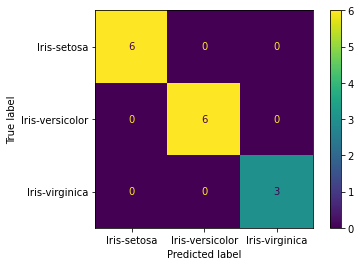

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

In [ ]:
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 1.0


# 1-b)

In [ ]:
#normalizing the data 

x1_normal = x1-min(x1)
x1_normal = x1_normal/max(x1_normal)
x2_normal = x2-min(x2)
x2_normal = x2_normal/max(x2_normal)
x3_normal = x3-min(x3)
x3_normal = x3_normal/max(x3_normal)
x4_normal = x4-min(x4)
x4_normal = x4_normal/max(x4_normal)

In [ ]:
x=np.c_[x1_normal,x2_normal,x3_normal,x4_normal]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=25)

In [ ]:
clf = SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

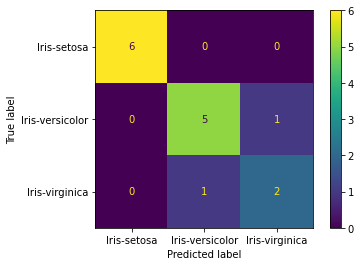

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

In [ ]:
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.8666666666666667


# 1-c)

In [ ]:
#1) Linear Kernel
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

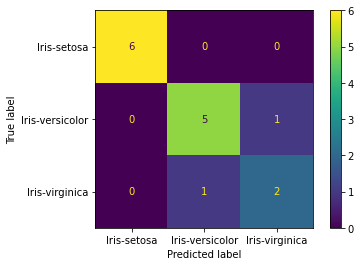

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

In [ ]:
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.8666666666666667


In [ ]:
#2) Poly Kernel
clf = SVC(kernel='poly')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

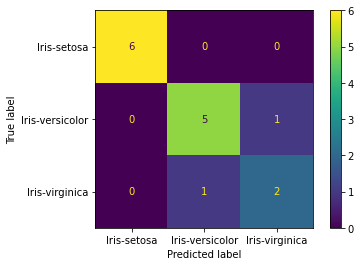

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

In [ ]:
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.8666666666666667


In [ ]:
#3) rbf Kernel
clf = SVC(kernel='rbf')
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

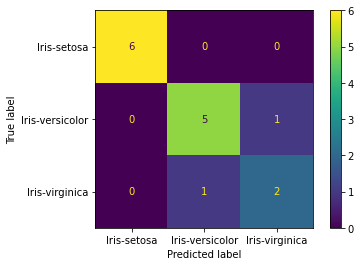

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

In [ ]:
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 0.8666666666666667


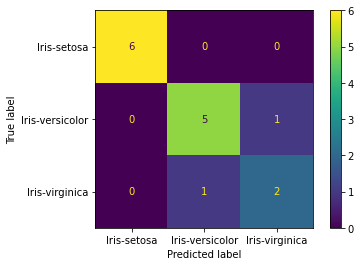

Accuracy: 0.8666666666666667


In [ ]:
#4) sigmoid kernel
clf = SVC(kernel='rbf')
clf.fit(x_train,y_train)
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

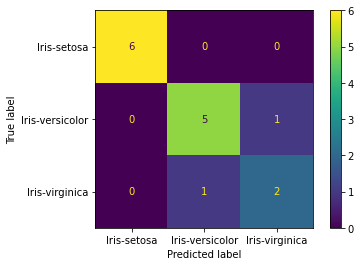

Accuracy: 0.8666666666666667


In [ ]:
#5) precomputed kernel
clf = SVC(kernel='precomputed')
kernel_train = np.dot(x_train, x_train.T)  # linear kernel
clf.fit(kernel_train, y_train)
kernel_test = np.dot(x_test, x_train.T)
y_predicted = clf.predict(kernel_test)
plot_confusion_matrix(clf, kernel_test, y_test)  
plt.show()
print('Accuracy:', accuracy_score(y_test,y_predicted))

---
## **Q.2)**

In [ ]:
data = pd.read_csv('bill_authentication.csv')
x1 = np.array(data['Variance'])
x2 = np.array(data['Skewness'])
x3 = np.array(data['Curtosis'])
x4 = np.array(data['Entropy'])
y = np.array(data['Class'])
x=np.c_[x1,x2,x3,x4]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=25)

In [ ]:
clf = SVC()
clf.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

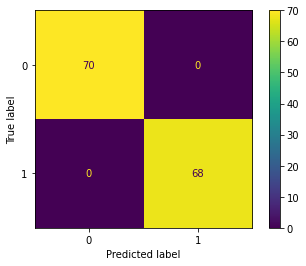

In [ ]:
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()

In [ ]:
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 1.0


In [ ]:
#normalizing the data 

x1_normal = x1-min(x1)
x1_normal = x1_normal/max(x1_normal)
x2_normal = x2-min(x2)
x2_normal = x2_normal/max(x2_normal)
x3_normal = x3-min(x3)
x3_normal = x3_normal/max(x3_normal)
x4_normal = x4-min(x4)
x4_normal = x4_normal/max(x4_normal)

In [ ]:
x=np.c_[x1_normal,x2_normal,x3_normal,x4_normal]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=25)

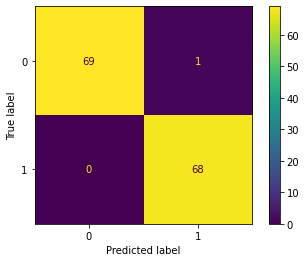

Accuracy: 0.9927536231884058


In [ ]:
#1) linear kernel
clf = SVC(kernel='linear')
clf.fit(x_train,y_train)
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

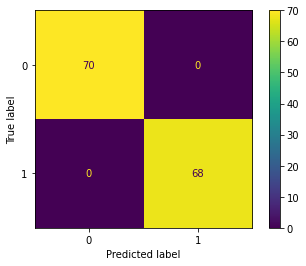

Accuracy: 1.0


In [ ]:
#2) poly kernel
clf = SVC(kernel='poly')
clf.fit(x_train,y_train)
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

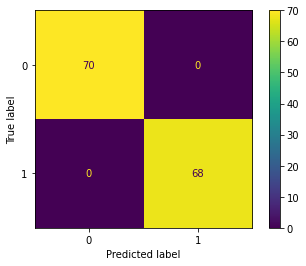

Accuracy: 1.0


In [ ]:
#3) rbf kernel
clf = SVC(kernel='rbf')
clf.fit(x_train,y_train)
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

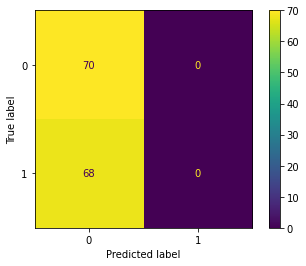

Accuracy: 0.5072463768115942


In [ ]:
#4) sigmoid kernel
clf = SVC(kernel='sigmoid')
clf.fit(x_train,y_train)
plot_confusion_matrix(clf, x_test, y_test)  
plt.show()
y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

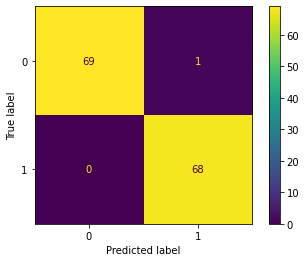

Accuracy: 0.9927536231884058


In [ ]:
#5) precomputed kernel
clf = SVC(kernel='precomputed')
kernel_train = np.dot(x_train, x_train.T)  # linear kernel
clf.fit(kernel_train, y_train)
kernel_test = np.dot(x_test, x_train.T)
y_predicted = clf.predict(kernel_test)
plot_confusion_matrix(clf, kernel_test, y_test)  
plt.show()
print('Accuracy:', accuracy_score(y_test,y_predicted))

---
## **Q.3)**

In [ ]:
#implementation of hard-margin-svm-classifier using cvxopt

def hard_margin_svm(X, y):

  m,n = X.shape
  y = y.reshape(-1,1) * 1.
  X_dash = y * X
  H = np.dot(X_dash , X_dash.T) * 1.

  #Converting into cvxopt format
  P = cvxopt_matrix(H)
  q = cvxopt_matrix(-np.ones((m, 1)))
  G = cvxopt_matrix(-np.eye(m))
  h = cvxopt_matrix(np.zeros(m))
  A = cvxopt_matrix(y.reshape(1, -1))
  b = cvxopt_matrix(np.zeros(1))

  #Setting solver parameters 
  cvxopt_solvers.options['show_progress'] = False
  cvxopt_solvers.options['abstol'] = 1e-10
  cvxopt_solvers.options['reltol'] = 1e-10
  cvxopt_solvers.options['feastol'] = 1e-10

  #Run solver
  sol = cvxopt_solvers.qp(P, q, G, h, A, b)
  alphas = np.array(sol['x'])

  #theta parameter in vectorized form
  theta = ((y * alphas).T @ X).reshape(-1,1)

  #Selecting the set of indices svs corresponding to non zero parameters
  svs = (alphas > 1e-4).flatten()

  #Computing theta0
  theta0 = y[svs] - np.dot(X[svs], theta)

  return theta,theta0[0],svs

In [ ]:
#hard-margin-svm-classifier predictor for implemented classifier

def hard_margin_svm_predict(theta, theta0, x):
  y = np.matmul(x,theta)+theta0
  for i in range(len(y)):
    if y[i]>=0:
      y[i]=1
    else:
      y[i]=-1
  return y

In [ ]:
#reading iris dataset

data = pd.read_csv('Iris.csv')
x1 = np.array(data['SepalLengthCm'])
x2 = np.array(data['PetalWidthCm'])
y = np.array(data['Species'])
for i in range(len(y)):
  if y[i]=='Iris-setosa':
    y[i]=1
  else:
    y[i]=-1
y = y.astype(int)
x=np.c_[x1,x2]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=25)

In [ ]:
#calling implemented svm 
theta,theta0,svs = hard_margin_svm(x_train, y_train)

In [ ]:
#printing the parameters for the decision boundary hyperplane

print('Theta:',theta)
print('Theta0:',theta0)

Theta: [[-5.38433585e-12]
 [-5.00000000e+00]]
Theta0: [4.]


In [ ]:
#accuracy for implemented model
y_predicted = hard_margin_svm_predict(theta, theta0, x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 1.0


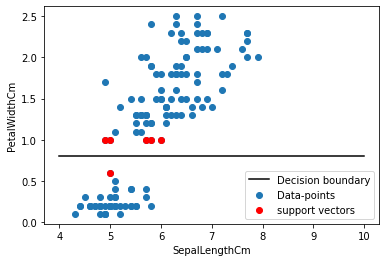

In [ ]:
#plotting decision boundary, support vectors, data-points

epsilon = 1e-4
x_1 = np.arange(4,10,0.01)
x_2 = np.arange(0,3,0.01)
x_ax = []
y_ax = []
for i in x_1:
  for j in x_2:
    if theta[0]*i + theta[1]*j + theta0 <= epsilon and theta[0]*i + theta[1]*j + theta0 >= -epsilon:
      x_ax.append(i)
      y_ax.append(j)
plt.plot(x_ax,y_ax,color='black',label='Decision boundary')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')
t1 = []
t2 = []
t11=[]
t22=[]
for i in range(len(svs)):
  if svs[i] == True:
    if y_train[i]==1:
      t1.append(x_train[i][0])
      t2.append(x_train[i][1])
    else:
      t11.append(x_train[i][0])
      t22.append(x_train[i][1])
a1 = np.append(np.array(t1),np.array(t11))
a2 = np.append(np.array(t2),np.array(t22))
plt.scatter(x_train[:,0],x_train[:,1],label='Data-points')
plt.scatter(a1,a2,color='red',label='support vectors')
plt.legend()
plt.show()

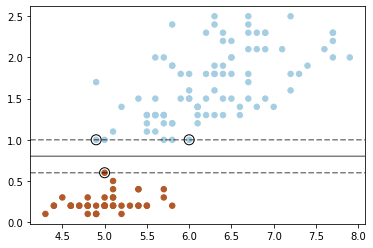

In [ ]:
#using sklearn library

clf = SVC(kernel='linear', C=1000)
clf.fit(x_train, y_train)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

In [ ]:
#accuracy for sklearn

y_predicted = clf.predict(x_test)
print('Accuracy:', accuracy_score(y_test,y_predicted))

Accuracy: 1.0


In [ ]:
#throwing all the point except support vectors

x_train_modified = np.copy(x_train).reshape(135,2)
y_train_modified = np.copy(y_train)
ind = []
for i in range(len(svs)):
  if svs[i] == False:
    ind.append(i)

ind = np.array(ind)
ind = ind.astype(int)
x_train_modified = np.delete(x_train_modified,ind,axis = 0)
y_train_modified = np.delete(y_train_modified,ind,axis=0)

In [ ]:
#running the implemented svm classifier on only support vectors identified earlier

theta,theta0,svs = hard_margin_svm(x_train_modified, y_train_modified)

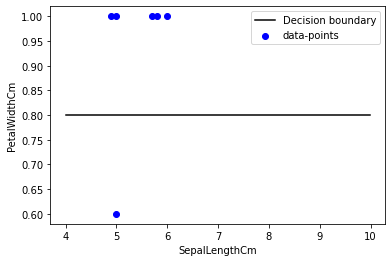

In [ ]:
#plotting the decision boundary

epsilon = 1e-4
x_1 = np.arange(4,10,0.01)
x_2 = np.arange(0,3,0.01)
x_ax = []
y_ax = []
for i in x_1:
  for j in x_2:
    if theta[0]*i + theta[1]*j + theta0 <= epsilon and theta[0]*i + theta[1]*j + theta0 >= -epsilon:
      x_ax.append(i)
      y_ax.append(j)
plt.plot(x_ax,y_ax,color='black',label='Decision boundary')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalWidthCm')
plt.scatter(x_train_modified[:,0],x_train_modified[:,1],color='blue',label = 'data-points')
plt.legend()
plt.show()

### Yes, the decision boundary remains the same